<a href="https://colab.research.google.com/github/saipragna25/255-assignment4-extended/blob/main/dmassignment_4_extension_dimenstionality_Reduction_on_Image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab to demonstrate various dimensionality reduction techniques (Image Data): 


i) PCA

ii) SVD

iii) LLE

iv) t-SNE

v) ISOMAP

vi) UMAP



 

In [12]:
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Load the digit data from sklearn

In [13]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)


In [14]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ...,  4.,  0.,  0.],
        [ 0.,  0.,  6., ...,  6.,  0.,  0.]]),
 'target': array([0, 1, 2, ..., 4, 4, 0]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [15]:
digits['images'][1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [16]:
digits['target'][0]

0

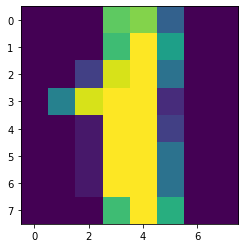

In [17]:
H = digits['images'][1]
plt.imshow(H, interpolation='none')
plt.show()

In [18]:
flattened_images=[]
for i in digits['images']:
  flattened_images.append(i.flatten())

flattened the data from 2D array to 1D array.

In [19]:
flattened_dataframe = pd.DataFrame(flattened_images)

In [20]:
flattened_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [21]:
sc = StandardScaler()
transformed_df = sc.fit_transform(flattened_dataframe)

In [22]:
transformed_df

array([[ 0.        , -0.39943855, -0.16703526, ..., -1.14434334,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855, -1.14805039, ...,  0.62132675,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855, -1.14805039, ...,  1.68072881,
         1.54537005, -0.24520445],
       ...,
       [ 0.        , -0.39943855, -1.14805039, ...,  0.44475974,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855, -1.14805039, ..., -0.4380753 ,
        -0.48218707, -0.24520445],
       [ 0.        , -0.39943855,  0.02916776, ..., -0.08494129,
        -0.48218707, -0.24520445]])

In [23]:
covariance_matrix = np.cov(transformed_df.T)

In [24]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


In [25]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])


Eigenvalues arranged in descending order:
9.38602294430673
6.259089545946311
4.890136767833185
4.280197815521955
2.957542037256334
2.72438781477647
2.2447381552755608
2.0380919622281928
1.805584810470339
1.7019314896894655
1.5311497473965145
1.392582735446213
1.3549583563736525
1.1656551958564667
1.1316984807768597
1.071290728909252
0.9910113310411474
0.9285440251415401
0.8678992594921707
0.8234394181663737
0.7571794555272822
0.7275389521598369
0.6724142439257461
0.6414383189700339
0.5928164412526188
0.5731322782092034
0.5170278726648557
0.48978578957973307
0.46563299053209756
0.4453059955889489
0.4063028000068058
0.38106827143131067
0.35091489932497
0.3425727729174111
0.30603291608683175
0.2898543168430505
0.28236719621305806
0.2560408297908031
0.2450227613999164
0.22479113951803226
0.044621229628077325
0.05041638363435875
0.06018570507145881
0.19625642400910082
0.19301193370442019
0.18382661319306437
0.1793604604161175
0.07254654081731053
0.07746893379933747
0.08179380934503513
0.088

In [26]:
pca = PCA()


In [27]:
pca = pca.fit(transformed_df)

In [28]:
explained_variance = pca.explained_variance_ratio_

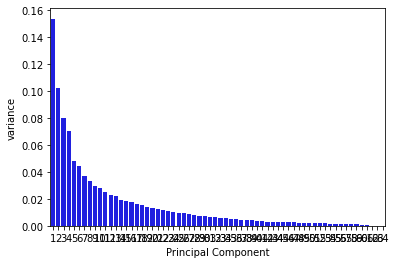

In [29]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':[i+1 for i in range(64)]})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

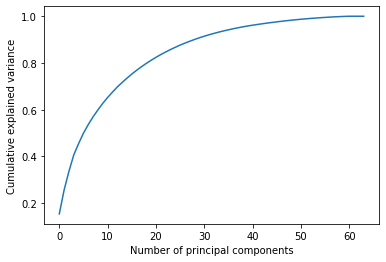

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [31]:
pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(flattened_dataframe)

In [32]:
pca_2d

array([[ 10.21407756,  22.49384873],
       [ -2.21147417, -26.29887675],
       [  1.20456813, -14.1644209 ],
       ...,
       [ 28.1007317 ,  -8.24942865],
       [ 28.50237148, -12.53727008],
       [ 13.66670974,  18.85186688]])

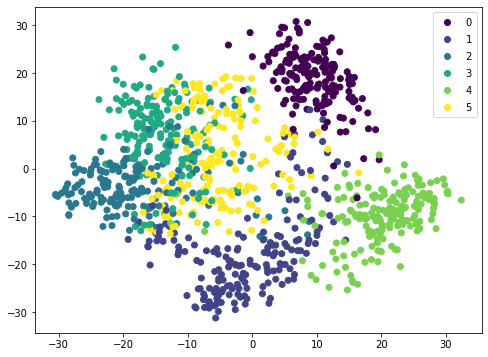

In [33]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(pca_2d[:,0], pca_2d[:,1],c=digits['target'],label=digits['target_names'])
plt.legend(*scatter.legend_elements())

#SVD

In [34]:

u, s, v = np.linalg.svd(flattened_dataframe, full_matrices=True)

In [36]:

u.shape


(1083, 1083)

In [37]:

s.shape

(64,)

In [38]:

v.shape

(64, 64)

Text(0, 0.5, 'Percent of the variance explained')

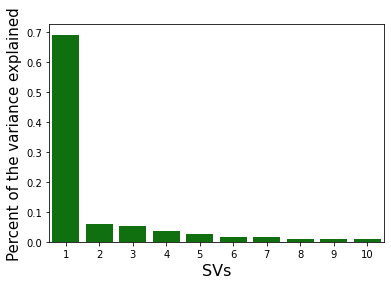

In [40]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained[:10])+1)),
            y=variance_explained[:10], color="GREEN")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [41]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=digits["target"].tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,0,0.027055,0.021058
1,1,0.032900,-0.000641
2,2,0.032591,0.003787
3,3,0.026865,-0.033089
4,4,0.024066,0.047796


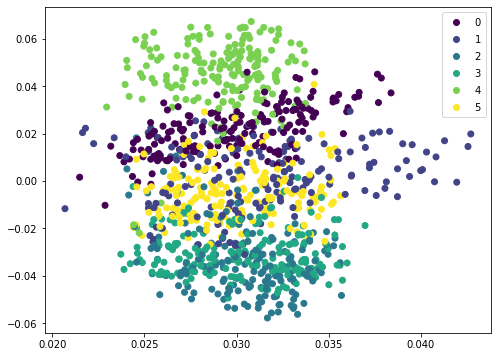

In [42]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(svd_df['SV1'],svd_df['SV2'],c=svd_df['Class'],label=digits['target_names'])
plt.legend(*scatter.legend_elements())

#Applying LLE, TSNE, ISOMAP and doing the comparison as well on them.

In [43]:
import matplotlib.pyplot as plt

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30



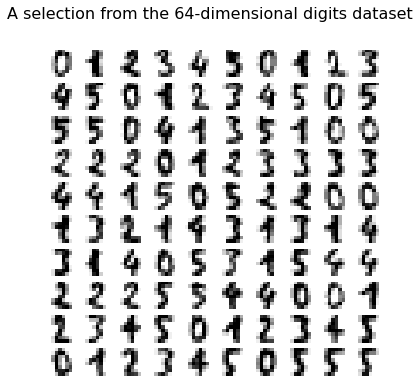

In [44]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [45]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)

    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        ax.text(
            X[i, 0],
            X[i, 1],
            str(y[i]),
            color=plt.cm.Dark2(y[i]),
            fontdict={"weight": "bold", "size": 9},
        )

        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

# Comapring different techniques and we need to note a few things:

* The RandomTreesEmbedding is not technically a manifold embedding method, as it learn a high-dimensional representation on which we apply a dimensionality reduction method. However, it is often useful to cast a dataset into a representation in which the classes are linearly-separable.

* The LinearDiscriminantAnalysis and the NeighborhoodComponentsAnalysis, are supervised dimensionality reduction method, i.e. they make use of the provided labels, contrary to other methods.

* The TSNE is initialized with the embedding that is generated by PCA in this example. It ensures global stability of the embedding, i.e., the embedding does not depend on random initialization.

In [46]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=100),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2, init="pca", learning_rate="auto", random_state=0
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="random", random_state=0
    ),
}

We store the projected data as well as the computational time needed to perform each projection.

In [53]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name]=transformer.fit_transform(data,y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Computing NCA embedding...


we plot the resulting projection given by each method, and found LLE does better than other flavors of the algorithm.

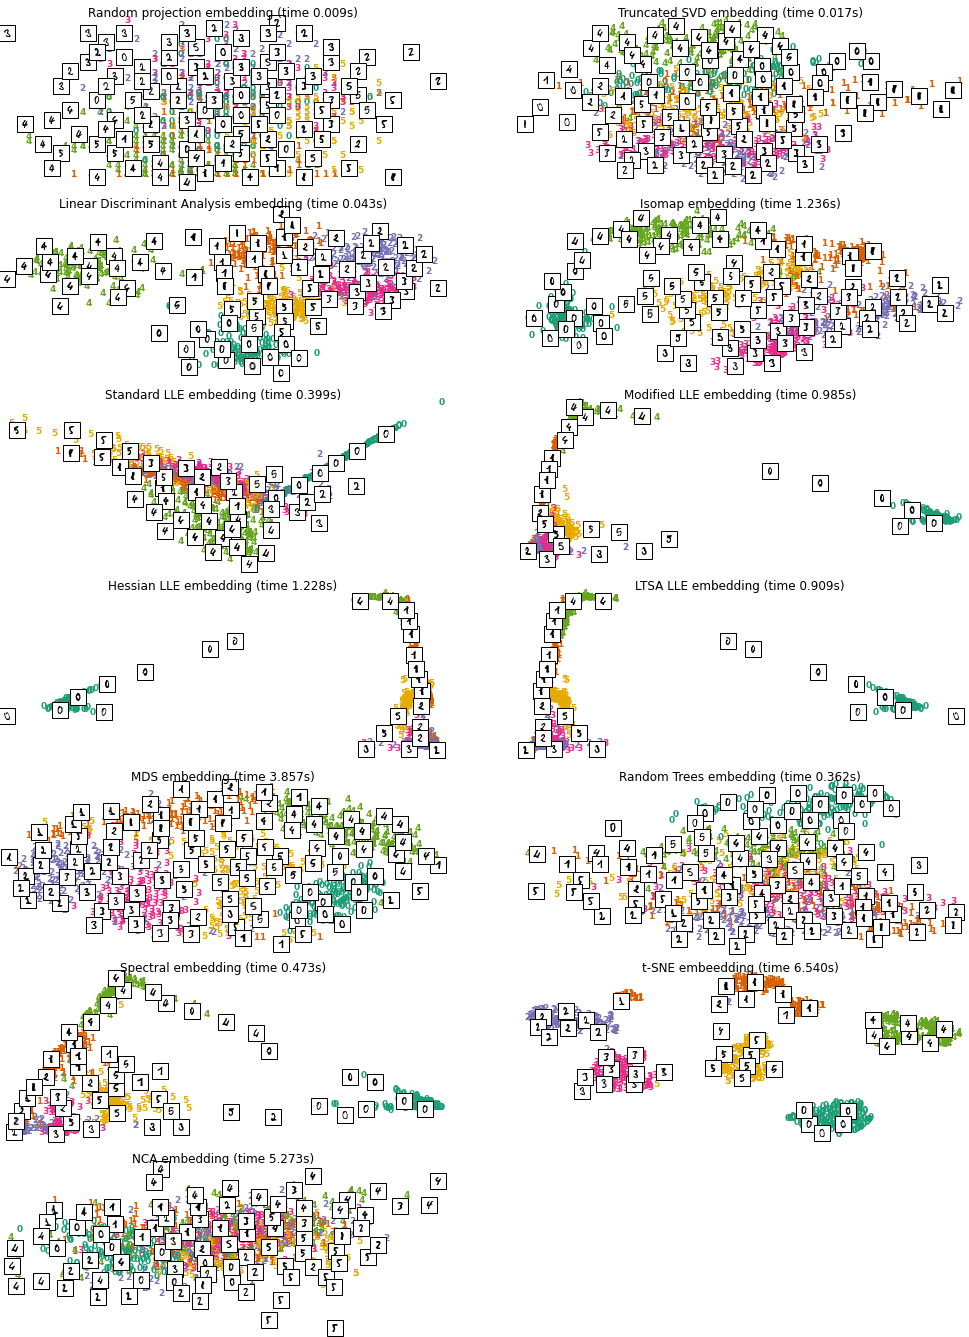

In [54]:
from itertools import zip_longest

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(17, 24))

for name, ax in zip_longest(timing, axs.ravel()):
    if name is None:
        ax.axis("off")
        continue
    title = f"{name} (time {timing[name]:.3f}s)"

    plot_embedding(projections[name], title, ax)

plt.show()

#UMAP

In [63]:
!pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import umap
import time
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(flattened_dataframe)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 12.101933002471924 seconds


In [67]:
mapper = umap.UMAP().fit(digits.data)

In [68]:
!pip install "umap-learn[plot]"
import colorcet
import holoviews as hv
import sklearn.decomposition
import umap.plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


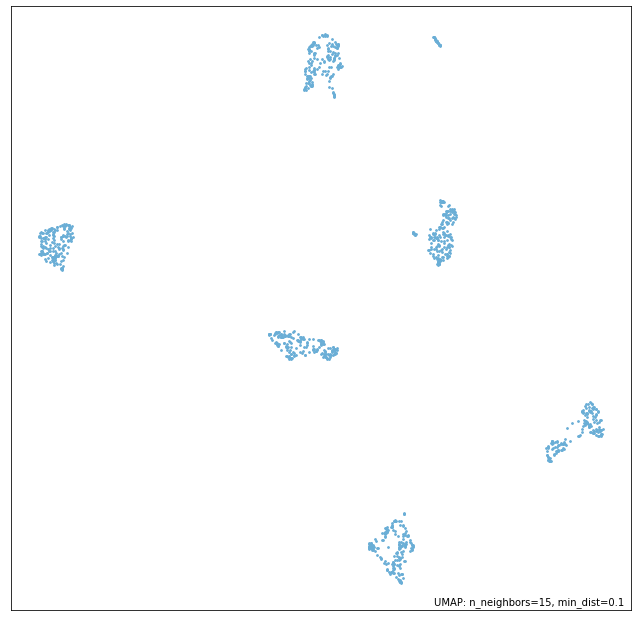

In [69]:
umap.plot.points(mapper)


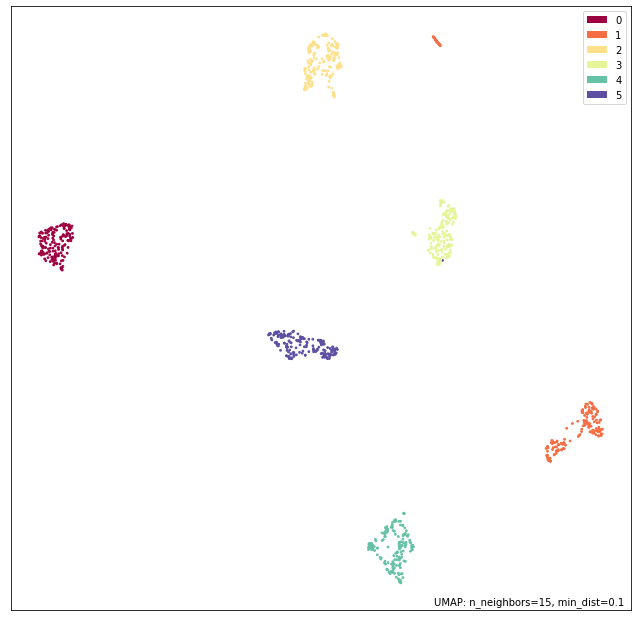

In [70]:
umap.plot.points(mapper, labels=digits.target)

# Conclusion



As we use a dimensionality reduction technique to the high-dimensional representation that the RandomTreesEmbedding learns, it is not technically a manifold embedding method. The classes of a dataset can typically be separated linearly, hence doing so is frequently beneficial.

Contrary to previous methods, the Linear Discriminant Analysis and Neighborhood Components Analysis are supervised dimensionality reduction techniques that exploit the specified labels.

In this example, the embedding produced by PCA serves as the initialization for the TSNE. By ensuring that the embedding is globally stable and independent of random initialization, it assures that the embedding is robust.

In addition to the projected data, we also keep track of how long each projection took to compute.

LLE performs better than other methods when we plot the projection results provided by each.